In [300]:
import pandas as pd
import re
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns
import spacy
nlp = spacy.load('en')

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d  

### Didn't make it to work as it should ( SUbstituting too many words and not working in french tweets)
def replace_entities(s):
    """ replaces Named Entities in tweet s with constant "[NAMED]"
    """
    entities = '|'.join(["("+ent.text+")" for ent in nlp(s).ents])
    return re.sub(entities,"[NAMED]",s)

def lemmatizing(s):
    """ lemmatize tweet
    """
    tweet = [token.lemma_ for token in nlp(s)] 
    return " ".join(tweet)
 
def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    
    clean_pattern = [r'(@\w+=?:?)', #Mentions
                     r'(RT)', # Retweets
                     r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', # urls
                     r'(  +)', #Extra spaces
                     r'(\n)', # Break lines
                     r'[(]|[)]',# Parenthesis 
                     r'(#\w+)', # tags
                     r'(&w\+)'] 
    
    clean_pattern = '|'.join(clean_pattern)
    s = re.sub(clean_pattern,'',s)

    
    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    
    #s = lemmatizing(s) 
    
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    
    #s = replace_entities(s)
    
    # or adding the part of speech or dependency code to the word 
    
    return s

In [301]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [302]:
X.map(clean_twitter)

0         Here's CNN on Sharia law. You can be stoned or have your hands cut off, bu...
1         LOOK obama Clinton cronies ILLEGALLY arm &amp; train muslims terrorist inc...
2                                                         from 2013  gets crowned     …
3                                                    Say 'Islam is peace', or else!    
4                                                       All aboard the Trump Train!  🚂 
5          FLASHBACK &gt;&gt; Judicial Watch Releases Huma Abedin Deposition Testimony 
6            Following FBI presser,  says “the system is rigged!”  &amp;  weigh in  7pm
7                                        Trump: "We're Running Against a Rigged Press" 
8         Literally 98% of Hillary supporters I see online are astroturfed spammers ...
9                                                                           Islam. ... 
10                                      .PSYCHO - MOTHERHillary at her most EVIL.    h…
11        The unthinkable has ha

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

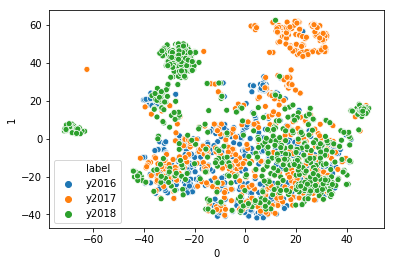

In [304]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

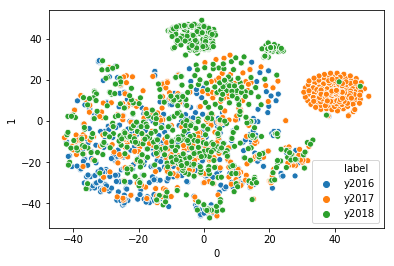

In [305]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

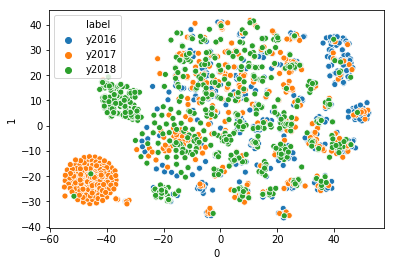

In [306]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

stop_words = []
with open("NLTK's list of english stopwords") as f:
    for line in f:
        stop_words.append(re.sub(r'\s',"",line))
        
vectorizer = TfidfVectorizer(preprocessor= clean_twitter, stop_words=stop_words)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)